In [1]:
import pandas as pd
import numpy

import matplotlib.pyplot as plt

from tslearn.utils import to_time_series_dataset

In [10]:
time_series = pd.read_csv("/Users/joe/Jupyter/Sickle-trait_RNA-seq/salmonQuant/data/counts/TPMs_dropVSA.csv", index_col='ORF')

time_series_sub = time_series[(time_series != 0).all(1)]
time_series_sub = time_series_sub.sample(frac=.2, axis = 0)

idx = list(time_series_sub.index)

In [11]:
# time_series_sub['median'] = time_series_sub.median(axis = 1)
# time_series_sub = time_series_sub[time_series_sub['median'] > 5]
# time_series_sub = time_series_sub.drop(['median'], axis =1)

ts_3D7 = time_series_sub.iloc[:,:64].copy()
ts_FUP = time_series_sub.iloc[:,64:128].copy()

In [12]:
AA13_3D7 = ts_3D7.iloc[:,:16].copy()
AA13_3D7_sub = AA13_3D7.loc[idx]
# AA13_3D7_sub = AA13_3D7.sample(n=1000)
# idx = list(AA13_3D7_sub.index)
AA13_3D7_array = AA13_3D7_sub.to_numpy()
AA13_3D7_data = to_time_series_dataset(AA13_3D7_array)

AA17_3D7 = ts_3D7.iloc[:,16:32].copy()
AA17_3D7_sub = AA17_3D7.loc[idx]
AA17_3D7_array = AA17_3D7_sub.to_numpy()
AA17_3D7_data = to_time_series_dataset(AA17_3D7_array)

AS15_3D7 = ts_3D7.iloc[:,32:48].copy()
AS15_3D7_sub = AS15_3D7.loc[idx]
AS15_3D7_array = AS15_3D7_sub.to_numpy()
AS15_3D7_data = to_time_series_dataset(AS15_3D7_array)

AS16_3D7 = ts_3D7.iloc[:,48:64].copy()
AS16_3D7_sub = AS16_3D7.loc[idx]
AS16_3D7_array = AS16_3D7_sub.to_numpy()
AS16_3D7_data = to_time_series_dataset(AS16_3D7_array)

AA13_FUP = ts_FUP.iloc[:,:16].copy()
AA13_FUP_sub = AA13_FUP.loc[idx]
AA13_FUP_array = AA13_FUP_sub.to_numpy()
AA13_FUP_data = to_time_series_dataset(AA13_FUP_array)

AA17_FUP = ts_FUP.iloc[:,16:32].copy()
AA17_FUP_sub = AA17_FUP.loc[idx]
AA17_FUP_array = AA17_FUP_sub.to_numpy()
AA17_FUP_data = to_time_series_dataset(AA17_FUP_array)

AS18_FUP = ts_FUP.iloc[:,32:48].copy()
AS18_FUP_sub = AS18_FUP.loc[idx]
AS18_FUP_array = AS18_FUP_sub.to_numpy()
AS18_FUP_data = to_time_series_dataset(AS18_FUP_array)

AS19_FUP = ts_FUP.iloc[:,48:64].copy()
AS19_FUP_sub = AS19_FUP.loc[idx]
AS19_FUP_array = AS19_FUP_sub.to_numpy()
AS19_FUP_data = to_time_series_dataset(AS19_FUP_array)

In [5]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler, TimeSeriesScalerMinMax

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn import metrics

In [6]:
k = 12
seed = 0

Soft-DTW k-means
12.602 --> 7.251 --> 6.738 --> 6.573 --> 6.541 --> 6.523 --> 6.511 --> 6.499 --> 6.492 --> 6.479 --> 6.470 --> 6.471 --> 6.465 --> 6.441 --> 6.444 --> 6.447 --> 6.444 --> 6.446 --> 6.449 --> 6.447 --> 6.448 --> 6.447 --> 6.448 --> 6.445 --> 6.446 --> 6.445 --> 6.446 --> 6.445 --> 6.446 --> 6.445 --> 6.446 --> 6.445 --> 6.445 --> 6.445 --> 6.445 --> 6.445 --> 6.445 --> 6.445 --> 


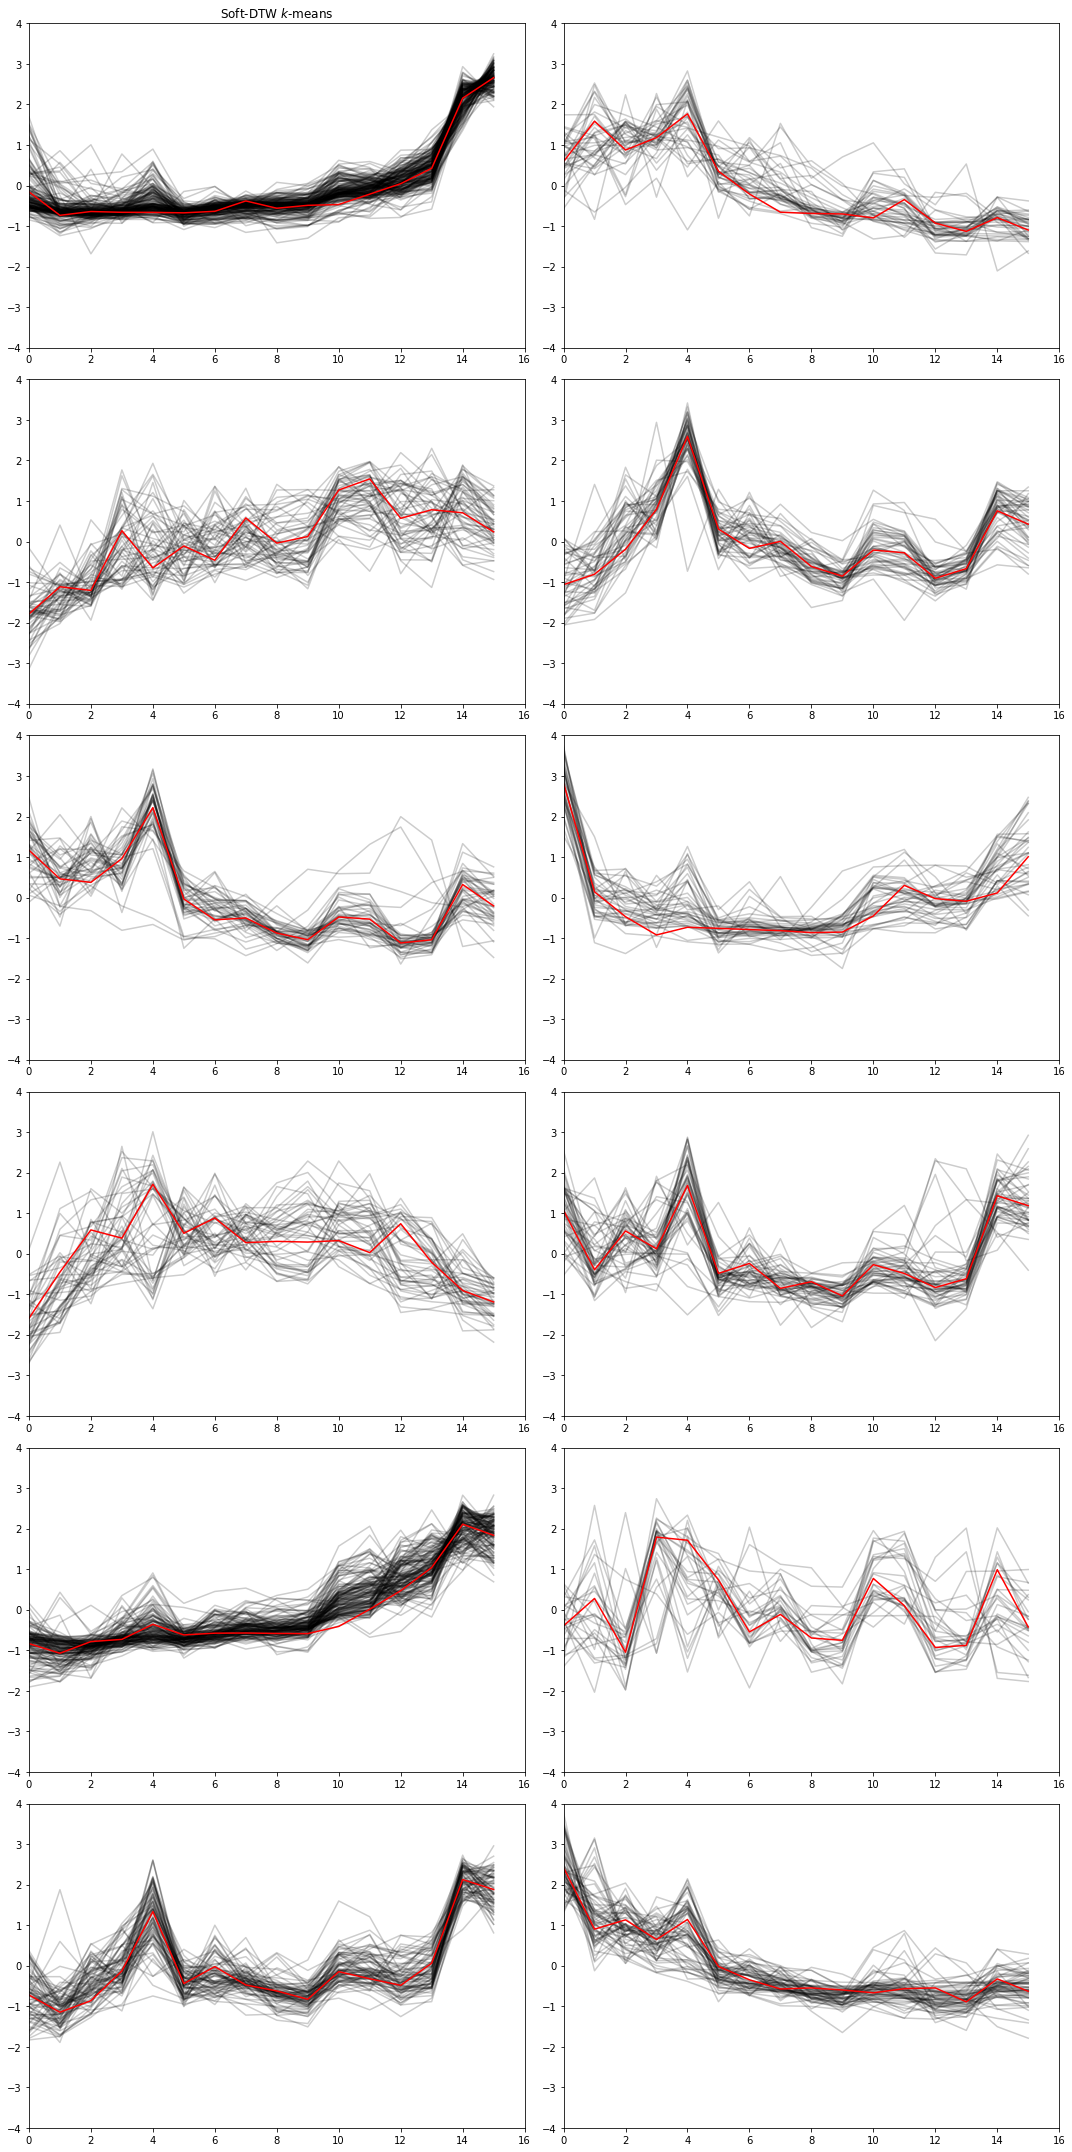

In [13]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_3D7_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

Soft-DTW k-means
10.731 --> 6.986 --> 6.642 --> 6.498 --> 6.296 --> 6.149 --> 6.136 --> 6.120 --> 6.126 --> 6.096 --> 6.098 --> 6.094 --> 6.096 --> 6.095 --> 6.096 --> 6.095 --> 6.097 --> 6.101 --> 6.099 --> 6.102 --> 6.105 --> 6.053 --> 6.033 --> 6.026 --> 6.028 --> 6.021 --> 6.026 --> 6.013 --> 6.020 --> 6.017 --> 6.017 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 6.016 --> 


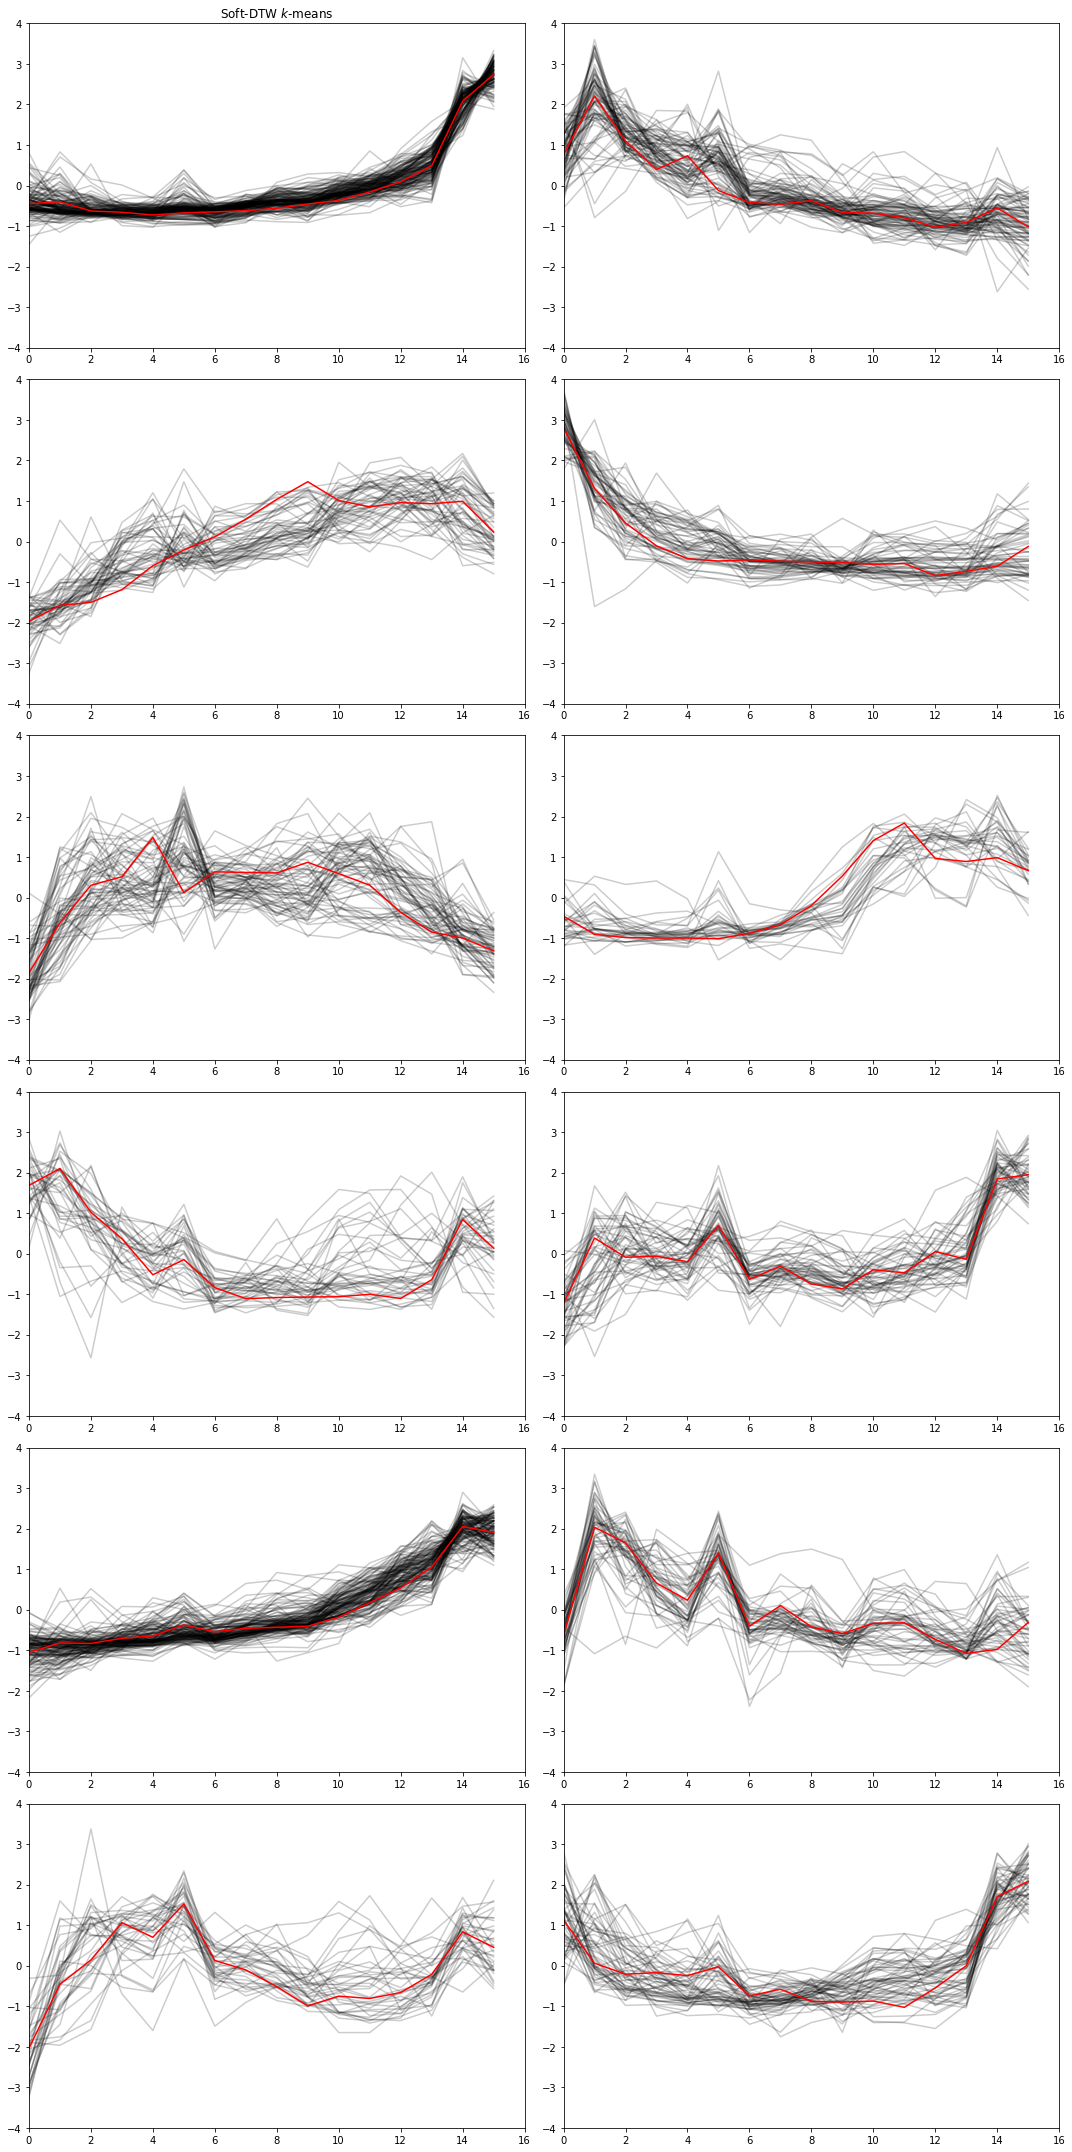

In [14]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA17_3D7_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [9]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS15_3D7_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

Soft-DTW k-means
7.894 --> 4.795 --> 4.420 --> 4.145 --> 4.022 --> 3.998 --> 3.986 --> 3.978 --> 3.977 --> 3.978 --> 3.974 --> 3.955 --> 3.955 --> 3.955 --> 3.954 --> 3.955 --> 3.954 --> 3.954 --> 3.953 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.955 --> 3.954 --> 3.955 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 3.954 --> 

KeyboardInterrupt: 

In [ ]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS16_3D7_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [ ]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA13_FUP_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [ ]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AA17_FUP_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [ ]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS18_FUP_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

In [ ]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(AS19_FUP_data)
sz = X_train.shape[1]

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,30))
for yi in range(k):
    plt.subplot(k/2, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 0:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()